In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#2.5 * np.random.randn(2, 4) + 3
#Two-by-four array of samples from N(3, 6.25):产生两行四列的array，服从均值为3，方差为6.25的正太分布

In [11]:
D=np.random.randn(1000,500)    #输入数据
hidden_layer_size=[500]*10
nonlinearities=['tanh']*len(hidden_layer_size)         #每一层的激活函数，都设置成了tanh
act={'relu':lambda x:np.maximum(0,x),'tanh':lambda x:np.tanh(x)}  #激活函数

In [24]:
Hs={}  #保存每一层的输出
for i in xrange(len(hidden_layer_size)):
    X=D if i==0 else Hs[i-1]  #X是第i层的输入
    fan_in=X.shape[1]
    fan_out=hidden_layer_size[i]
    W=np.random.randn(fan_in,fan_out)*1  #对每一层权重进行初始化，方差是0.01
    
    H=np.dot(X,W)  
    H=act[nonlinearities[i]](H)  #每一层的输出
    Hs[i]=H    #

input layer had mean 0.000549 and std 1.000252
hidden layer 1 had mean -0.001101 and std 0.982058
hidden layer 2 had mean 0.001301 and std 0.981762
hidden layer 3 had mean -0.000462 and std 0.981599
hidden layer 4 had mean 0.002601 and std 0.981696
hidden layer 5 had mean -0.001269 and std 0.981879
hidden layer 6 had mean 0.001315 and std 0.981679
hidden layer 7 had mean 0.001239 and std 0.981675
hidden layer 8 had mean 0.000621 and std 0.981573
hidden layer 9 had mean -0.001066 and std 0.981494
hidden layer 10 had mean 0.000349 and std 0.981648


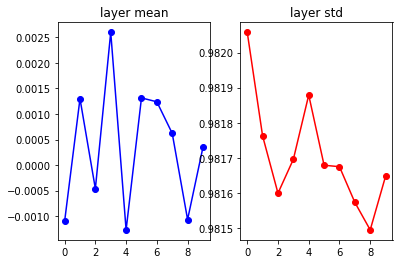

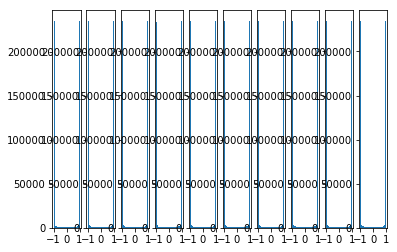

In [25]:
print 'input layer had mean %f and std %f'% (np.mean(D),np.std(D))
layer_means=[np.mean(H) for i,H in Hs.iteritems()]
layer_std=[np.std(H) for i,H in Hs.iteritems()]

for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f'%(i+1,layer_means[i],layer_std[i])

#画出每一层输出的均值和方差的分布
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(),layer_means,'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(),layer_std,'or-')
plt.title('layer std')
plt.show()
#
plt.figure()
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(),30,range=(-1,1))  #b=a.ravel() 将a矩阵转成一维数组
plt.show()